In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
file1=pd.read_csv("C://Users//lenovo//Downloads//takehome_users.csv",encoding="latin-1",parse_dates= True)
file2=pd.read_csv("C://Users//lenovo//Downloads//takehome_user_engagement.csv")

In [53]:
file1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22/04/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15/11/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19/03/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21/05/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17/01/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [54]:
file2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [55]:
import datetime
file2.time_stamp = pd.to_datetime(file2.time_stamp)

In [56]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [57]:
adopted = file2.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [58]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [59]:
file1 = file1.set_index(['object_id'])
file1.index.name = 'user_id'

In [60]:
file1 = pd.concat([file1, adopted], axis=1, join='inner')
file1['adopted_user'] = file1['adopted_user'].astype(int)

In [61]:
file1.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
user_id,,,,,,,,,,
1,22/04/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,15/11/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,19/03/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,21/05/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,17/01/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [62]:
# set creation_time
file1.creation_time = pd.to_datetime(file1.creation_time)
file1['last_session_creation_time'] = file1['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [63]:
#now set that to datetime
file1['last_session_creation_time'] = pd.to_datetime(file1['last_session_creation_time'])


In [64]:
file1.invited_by_user_id = file1.invited_by_user_id.fillna(0)

In [65]:
file1['time_span_of_the_account'] = file1['last_session_creation_time'] - file1['creation_time']
file1['time_span_of_the_account'] = file1['time_span_of_the_account'].dt.days
file1 = file1.drop(['creation_time', 'last_session_creation_time'], axis=1)
file1.head()

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,136
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,5


In [66]:
file1 = file1.drop(['name','email'],axis=1)

In [67]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(file1['creation_source'])
file1.creation_source = creation_labels

org_id_labels = gle.fit_transform(file1['org_id'])
file1.org_id = org_id_labels

invited_labels = gle.fit_transform(file1['invited_by_user_id'])
file1.org_id = invited_labels



In [42]:
file1.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,0,1,0,2024,10803.0,0,0
2,1,0,0,48,316.0,1,136
3,1,0,0,264,1525.0,0,0
4,0,0,0,967,5151.0,0,1
5,0,0,0,984,5240.0,0,5


In [43]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
data = file1.drop('adopted_user', axis=1)
labels = file1.adopted_user

X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.9124313186813187

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report  
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2355
           1       0.81      0.70      0.75       557

    accuracy                           0.91      2912
   macro avg       0.87      0.83      0.85      2912
weighted avg       0.91      0.91      0.91      2912



In [46]:
#confusion matrix
cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[2265   90]
 [ 165  392]]


In [47]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

time_span_of_the_account      0.827886
org_id                        0.070455
invited_by_user_id            0.070432
creation_source               0.016968
opted_in_to_mailing_list      0.008019
enabled_for_marketing_drip    0.006240
Name: coef, dtype: float64

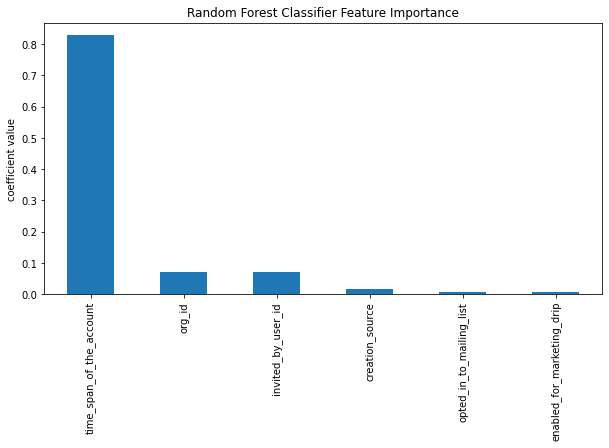

In [48]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()


From the above chart we can say that time_span_of_the_account is the best indicator.It indicates the time span between the account created and last time it was used, which tells us whether the user is an adopted user or not.
